# Pandas Basics
Pandas is another important library in the data science world. It is the standard for manipulating multidimensional data in an efficient way using Python and has many powerful routines we will use to investigate and manipulate data sets.

### Resources
- [Pandas Documentation](https://pandas.pydata.org/docs/reference/index.html)
- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html)
- [Pandas Basics Notes](https://github.com/richardfoltyn/python-statistics/blob/main/latex/unit08.pdf)

## What is Pandas?
The NumPy arrays we have used so far provide essential features for the cleaned, organized data we see in numerical computing tasks. However, they do have many limitations like flexibility(e.g., attaching labels to data, working with missing data, etc.) and poor functionality for operations that are not performed element-wise(e.g., groupings, pivots, etc.) *which are important pieces of analyzing the less structured data available in many forms in the world around us.*

For example, we usually want to process data sets with
1. several variables
2. multiple observations, which need not be identical across variables (some values may be missing)
3. non-homogenous data types: for examples, names need to be stored as strings, birthdays as dates and income as a floating-point number.

While NumPy can in principle handle such situations, it puts all the burden on the user.


Imagine we want to store names, birth dates and annual income for two people:

| Name | Date of birth | Income |
| ---- | ---- | ---- |
| Alice | 1985-01-01 | 30,000 |
| Bob | 1997-05-12 | - |

There is no income report for Bob, so it is missing. With NumPy, we could store this information like this:


[['Alice' datetime.date(1985, 1, 1) 30000]
 ['Bob' datetime.date(1997, 5, 12) None]]


While we can store and create arrays like this, we have lost a lot of functionality we need for data analysis since everything is stored as a generic `object`.

object


Pandas is a newer package built on top of NumPy, and provides an efficient implementation of a `DataFrame`. `DataFrames` are essentially multidimensional arrays with attached row and column labels that can handle multiple data types and/or missing data. Pandas also defines `Series` which represents observations of a single variable. Not only is Pandas is a convenient medium for storing labeled data, it implements many powerful operations from database managers and spreadsheet programs.
 
Pandas was created to offer more versatile data structures that are straightforward to use for storing, manipulating and analyzing heterogeneous data:
1. Data is clearly organized in *variables* and *observations*
2. Each variable is permitted to have a different data type.
3. We can use *labels* to select observations, instead of having to use a linear numerical index as with NumPy. We could, for example, index a data set using National Insurance Numbers.
4. Pandas offers many convenient data aggregation and reduction routines that can be applied to subsets of data. For example, we can easily group observations by city and compute average incomes.
5. Pandas also offers many convenient data import / export functions that go beyond what’s in NumPy.

Then shouldn't we be using pandas at all times, then? No!
- For low-level tasks where performance is essential, use NumPy.
- For homogenous data without any particular data structure, use NumPy.
- On the other hand, if data is heterogeneous, needs to be imported from an external data source and cleaned or transformed before performing computations, use pandas. 

## Using pandas
Pandas has two main data structures:
1. `Series` represents observations of a single variable.
2. `DataFrame` is a container for several variables. You can think of each individual column of a `DataFrame` as a `Series`, and each row represents one observation.


The easiest way to create a `Series` or `DataFrame` is to create them from pre-existing data.
To access pandas data structures and routines, we need to import them first. The near-universal
convention is to make pandas available using the name `pd`:

## Pandas Series object
A Pandas `Series` is a one-dimensional array of indexed data. It can be created from a list or array as follows:

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

As we can see, the `Series` object is a combination of a sequence of values and a sequence of indicies, which we can access with the `values` and `index` attributes.

array([0.25, 0.5 , 0.75, 1.  ])

RangeIndex(start=0, stop=4, step=1)

The `index` is an array-like object of type `pd.Index`, which we'll discuss in more detail later.

We can access elements in a `Series` the same way as regular Python lists with the familiar squarebracket notation.

0.5

Slicing works the same as well.

1    0.50
2    0.75
dtype: float64

So far, a `Series` object may seem basically interchangable with a NumPy array or a Python list.

The essential difference is the presence of the index: while the NumPy array has an *implicitly defined* integer index used to access the values, the pandas `Series` has an *explicitly defined* index associated with the values.

This explicit index definition gives the `Series` object additional capabilities. For example, the index doesn't need to be an integer, but can consist of values of any desired type. For example, if we wish, we can use strings as an indicies:

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

And we can access the elements the same way

0.5

Or we can use non-contiguous or non-sequential indices

7     0.25
6     0.50
3     0.75
10    1.00
dtype: float64

0.75

In this way, you can think of a pandas `Series` a bit like a specialization of a Python dictionary. 
- A dictionary is a structure that maps arbitrary keys to a set of arbitrary values
- A `Series` is a structure which maps typed keys to a set of typed values.

This typing is important: just as the type-specific compiled code behind a NumPy array makes it more efficient than a Python list for certain operations, the type information of a pandas `Series` makes it much more efficient than Python dictionaries for certain operations.

The `Series`-as-dictionary analogy can be made even more clear by constructing a `Series` object directly from a Python dictionary:


In [101]:
population_dict = {'California': 38332521,'Texas': 26448193,'New York': 19651127,'Florida': 19552860,'Illinois': 12882135}


California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

38332521

Though unlike a dictionary, the `Series` also supports array-style operations such as slicing

Texas       26448193
New York    19651127
Florida     19552860
Illinois    12882135
dtype: int64

## Pandas DataFrame object
We can create a `DataFrame` from a NumPy array:

,A,B,C
0,7,5,0
1,0,8,6
2,6,1,9
3,3,8,8
4,9,2,0
5,3,3,1
6,5,2,1
7,8,9,0
8,0,9,0
9,7,5,0


We can also recreate our data table from earlier with multiple data types:

,Names,Birthdate,Income
0,Alice,1985-01-01,30000.0
1,Bob,1997-05-12,NaN


If data types differ across columns, as in the above example, it is often convenient to create the
`DataFrame` by passing a dictionary as an argument. Each key represents a column name and each
corresponding value contains the data for that variable. This is also often eaiser than adding columns separately.

You can also create `DataFrames` from one of more `Series` objects. 

In [106]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})


,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


We will primarily be populating our `DataFrames` by reading in `.csv` files as you will see in the next section. Pandas also has support for creating `DataFrames` from other standard formats like JSON and XML.

## Viewing data
With large data sets, you hardly ever want to print the entire `DataFrame`. Pandas by default limits the
amount of data shown. You can use the `head()` and `tail()` methods to explicitly display a specific
number of rows from the top or the end of a `DataFrame`.

To illustrate, we use a data set of 23 UK universities that contains the following variables:
- `Instititution`: Name of the institution
- `Country`: Country/nation within the UK (England, Scotland, . . . )
- `Founded`: Year in which university (or a predecessor institution) was founded
- `Students`: Total number of students
- `Staff`: Number of academic staff
- `Admin`: Number of administrative staff
- `Budget`: Budget in million pounds
- `Russell`: Binary indicator whether university is a member of the Russell Group, an association of the UK’s top research universities.

The data was compiled based on information from Wikipedia.

We read in the data stored in the file `universities.csv` like this. 

,Institution,Country,Founded,Students,Staff,Admin,Budget,Russell
0,University of Glasgow,Scotland,1451,30805,2942.0,4003.0,626.5,1
1,University of Edinburgh,Scotland,1583,34275,4589.0,6107.0,1102.0,1
2,University of St Andrews,Scotland,1413,8984,1137.0,1576.0,251.2,0
3,University of Aberdeen,Scotland,1495,14775,1086.0,1489.0,219.5,0
4,University of Strathclyde,Scotland,1964,22640,NaN,3200.0,304.4,0
5,LSE,England,1895,11850,1725.0,2515.0,415.1,1
6,UCL,England,1826,41180,7700.0,5375.0,1451.1,1
7,University of Cambridge,England,1209,23247,7913.0,3615.0,2192.0,1
8,University of Oxford,England,1096,24515,7000.0,NaN,2450.0,1
9,University of Warwick,England,1965,27278,2610.0,4033.0,688.6,1


If we want to know what are columns are called, we can use the `columns` attribute.

Index(['Institution', 'Country', 'Founded', 'Students', 'Staff', 'Admin',
       'Budget', 'Russell'],
      dtype='object')

This is very similiar to how we already know to read in files, except it is built to read in CSVs as `DataFrames`. Now we can take a look at the first and last rows of the file

,Institution,Country,Founded,Students,Staff,Admin,Budget,Russell
0,University of Glasgow,Scotland,1451,30805,2942.0,4003.0,626.5,1
1,University of Edinburgh,Scotland,1583,34275,4589.0,6107.0,1102.0,1
2,University of St Andrews,Scotland,1413,8984,1137.0,1576.0,251.2,0


,Institution,Country,Founded,Students,Staff,Admin,Budget,Russell
18,University of Dundee,Scotland,1967,15915,1410.0,1805.0,256.4,0
19,Cardiff University,Wales,1883,25898,3330.0,5739.0,644.8,1
20,University of Stirling,Scotland,1967,9548,NaN,1872.0,113.3,0
21,Queen's University Belfast,Northern Ireland,1810,18438,2414.0,1489.0,369.2,1
22,Swansea University,Wales,1920,20620,NaN,3290.0,NaN,0


To quickly compute some descriptive statistics for the *numerical* variables in the `DataFrame`, we use `describe()`.

,Founded,Students,Staff,Admin,Budget,Russell
count,23.000000,23.000000,20.000000,19.000000,22.000000,23.000000
mean,1745.652174,24106.782609,3664.250000,3556.736842,768.609091,0.739130
std,256.992149,9093.000735,2025.638038,1550.434342,608.234948,0.448978
min,1096.000000,8984.000000,1086.000000,1489.000000,113.300000,0.000000
25%,1589.000000,18776.500000,2294.250000,2193.500000,340.850000,0.500000
50%,1826.000000,23247.000000,3307.500000,3485.000000,643.750000,1.000000
75%,1941.500000,30801.500000,4439.750000,4347.500000,1023.500000,1.000000
max,2004.000000,41180.000000,7913.000000,6199.000000,2450.000000,1.000000


Note that this automatically ignores the columns `Institution` and `Country` as they contain strings,
and computing the mean, etc. of a string variable does not make sense.

To see low-level information about the data type used in each column, we call `info()`:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Institution  23 non-null     object 
 1   Country      23 non-null     object 
 2   Founded      23 non-null     int64  
 3   Students     23 non-null     int64  
 4   Staff        20 non-null     float64
 5   Admin        19 non-null     float64
 6   Budget       22 non-null     float64
 7   Russell      23 non-null     int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 1.6+ KB


Pandas automatically discards missing information in computations. For example, the number of
academic staff is missing for several universities, so the number of non-null entries reported in the table
above is less than 23, the overall sample size.

### What questions do you want to answer?

Thinking about the dataset we just imported, what questions can we ask? What information would we want to know from this dataset? What questions can this dataset help us answer?

How many staff work at Oxford


## Indexing
Pandas supports two types of indexing:
1. Indexing by position. This is basically identical to the indexing of other Python and NumPy options.
2. Indexing by label, i.e., by the values assigned to the row or column index. These labels need not
be integers in increasing order, as is the case for NumPy. We will see how to assign labels below.


Pandas indexing is performed either by using brackets `[]`, or by using `.loc[]` for label indexing, or
`.iloc[]` for positional indexing.
Indexing via `[]` can be somewhat confusing:
- specifying `df['name']` returns the column name as a Series object.
- On the other hand, specifying a range such as `df[5:10]` returns the rows associated with the positions `5,. . . ,9.`


Let's use our example `DataFrame` to demonstrate different ways to index.

0               University of Glasgow
1             University of Edinburgh
2            University of St Andrews
3              University of Aberdeen
4           University of Strathclyde
5                                 LSE
6                                 UCL
7             University of Cambridge
8                University of Oxford
9               University of Warwick
10            Imperial College London
11              King's College London
12           University of Manchester
13              University of Bristol
14           University of Birmingham
15    Queen Mary University of London
16                 University of York
17           University of Nottingham
18               University of Dundee
19                 Cardiff University
20             University of Stirling
21         Queen's University Belfast
22                 Swansea University
Name: Institution, dtype: object

,Institution,Students
0,University of Glasgow,30805
1,University of Edinburgh,34275
2,University of St Andrews,8984
3,University of Aberdeen,14775
4,University of Strathclyde,22640
5,LSE,11850
6,UCL,41180
7,University of Cambridge,23247
8,University of Oxford,24515
9,University of Warwick,27278


,Institution,Country,Founded,Students,Staff,Admin,Budget,Russell
2,University of St Andrews,Scotland,1413,8984,1137.0,1576.0,251.2,0
3,University of Aberdeen,Scotland,1495,14775,1086.0,1489.0,219.5,0
4,University of Strathclyde,Scotland,1964,22640,NaN,3200.0,304.4,0


Pandas follows the Python convention that indexes start at 0, and the endpoint of a slice is not included.

You can also create whole new columns using indices.

,Institution,Country,Founded,Students,Staff,Admin,Budget,Russell,CostPerStudent
0,University of Glasgow,Scotland,1451,30805,2942.0,4003.0,626.5,1,0.020338
1,University of Edinburgh,Scotland,1583,34275,4589.0,6107.0,1102.0,1,0.032152
2,University of St Andrews,Scotland,1413,8984,1137.0,1576.0,251.2,0,0.027961
3,University of Aberdeen,Scotland,1495,14775,1086.0,1489.0,219.5,0,0.014856
4,University of Strathclyde,Scotland,1964,22640,NaN,3200.0,304.4,0,0.013445
5,LSE,England,1895,11850,1725.0,2515.0,415.1,1,0.035030
6,UCL,England,1826,41180,7700.0,5375.0,1451.1,1,0.035238
7,University of Cambridge,England,1209,23247,7913.0,3615.0,2192.0,1,0.094292
8,University of Oxford,England,1096,24515,7000.0,NaN,2450.0,1,0.099939
9,University of Warwick,England,1965,27278,2610.0,4033.0,688.6,1,0.025244


### Manipulated indicies
Pandas uses *labels* to index and align data. These can be integer values starting at 0 with increments
of 1 for each additional element, which is the default, but they need not be. The two main methods to
manipulate indices are:
- `set_index(keys=['column1', ...])`: uses the values of column1 and optionally additional columns as indices, discarding the current index.
- `reset_index()`: resets the index to its default value, a sequence of increasing integers startingat 0.
Both methods return a new `DataFrame` and leave the original `DataFrame` unchanged. If we want to
change the existing `DataFrame`, we need to pass the argument `inplace=True`.

If we want to know what our indices currently are we can use the `index` attribute, just like `Series` data.

RangeIndex(start=0, stop=23, step=1)

As we can see, right now the indices of the `DataFrame` are the numbers 0, 1,..., 22

We can replace the row index and use the lowercase Roman characters `a, b, c,...` as labels
instead of integers:

,Institution,Country,Founded,Students,Staff,Admin,Budget,Russell,CostPerStudent
index,,,,,,,,,
a,University of Glasgow,Scotland,1451,30805,2942.0,4003.0,626.5,1,0.020338
b,University of Edinburgh,Scotland,1583,34275,4589.0,6107.0,1102.0,1,0.032152
c,University of St Andrews,Scotland,1413,8984,1137.0,1576.0,251.2,0,0.027961
d,University of Aberdeen,Scotland,1495,14775,1086.0,1489.0,219.5,0,0.014856
e,University of Strathclyde,Scotland,1964,22640,NaN,3200.0,304.4,0,0.013445
f,LSE,England,1895,11850,1725.0,2515.0,415.1,1,0.035030
g,UCL,England,1826,41180,7700.0,5375.0,1451.1,1,0.035238
h,University of Cambridge,England,1209,23247,7913.0,3615.0,2192.0,1,0.094292
i,University of Oxford,England,1096,24515,7000.0,NaN,2450.0,1,0.099939


Now that we changed our index from numbers to letters, we can get certain rows using our new indices.

,Institution,Country,Founded,Students,Staff,Admin,Budget,Russell,CostPerStudent
index,,,,,,,,,
a,University of Glasgow,Scotland,1451,30805,2942.0,4003.0,626.5,1,0.020338
b,University of Edinburgh,Scotland,1583,34275,4589.0,6107.0,1102.0,1,0.032152
c,University of St Andrews,Scotland,1413,8984,1137.0,1576.0,251.2,0,0.027961


To add to the confusion, note that when specifying a range in terms of labels, the last element *is* included!
Hence the row with index `c` in the above example is shown.

We can reset the index to its default integer values using the `reset_index()` method:

,Institution,Country,Founded,Students,Staff,Admin,Budget,Russell,CostPerStudent
0,University of Glasgow,Scotland,1451,30805,2942.0,4003.0,626.5,1,0.020338
1,University of Edinburgh,Scotland,1583,34275,4589.0,6107.0,1102.0,1,0.032152
2,University of St Andrews,Scotland,1413,8984,1137.0,1576.0,251.2,0,0.027961
3,University of Aberdeen,Scotland,1495,14775,1086.0,1489.0,219.5,0,0.014856
4,University of Strathclyde,Scotland,1964,22640,NaN,3200.0,304.4,0,0.013445
5,LSE,England,1895,11850,1725.0,2515.0,415.1,1,0.035030
6,UCL,England,1826,41180,7700.0,5375.0,1451.1,1,0.035238
7,University of Cambridge,England,1209,23247,7913.0,3615.0,2192.0,1,0.094292
8,University of Oxford,England,1096,24515,7000.0,NaN,2450.0,1,0.099939
9,University of Warwick,England,1965,27278,2610.0,4033.0,688.6,1,0.025244


We usually keep the indices as numbers because we often have more than 26 records in our `DataFrame`(as the programmer you would have to decide what comes after `z`: `aa`? `A`?), but theoretically you could use any string you wanted as an index. 


Pandas also has other specialty index types like `DatetimeIndex` and `TimedeltaIndex` that can be really useful for standardizing data with dates and times

**Generally speaking, when you are talking about indexing you are refering to the columns of a DataFrame. When you are talking about slicing, you are refering to rows.**

## Selecting elements
To more clearly distinguish between selection by label and by position, pandas provides the `.loc[]`
and `.iloc[]` methods of indexing. To make your intention obvious, you should therefore adhere to the
following rules:
1. Use `df['name']` only to select columns and nothing else.
2. Use `.loc[]` to select by label.
3. Use `.iloc[]` to select by position.


To illustrate, using `.loc[]` indexes by label:

,Institution,Students
4,University of Strathclyde,22640
5,LSE,11850
6,UCL,41180
7,University of Cambridge,23247
8,University of Oxford,24515


With `.loc[]` we can even perform slicing on column names, which is not possible with the simpler
`df[]` syntax:

,Institution,Country,Founded
4,University of Strathclyde,Scotland,1964
5,LSE,England,1895
6,UCL,England,1826
7,University of Cambridge,England,1209
8,University of Oxford,England,1096


Somewhat surprisingly, we can include boolean statements in `.loc[]` even though these are clearly not
labels. Here, we can use`.loc` to select all rows with the "Scotland" in the `Country` column.

,Institution,Country,Founded,Students,Staff,Admin,Budget,Russell,CostPerStudent
0,University of Glasgow,Scotland,1451,30805,2942.0,4003.0,626.5,1,0.020338
1,University of Edinburgh,Scotland,1583,34275,4589.0,6107.0,1102.0,1,0.032152
2,University of St Andrews,Scotland,1413,8984,1137.0,1576.0,251.2,0,0.027961
3,University of Aberdeen,Scotland,1495,14775,1086.0,1489.0,219.5,0,0.014856
4,University of Strathclyde,Scotland,1964,22640,NaN,3200.0,304.4,0,0.013445
18,University of Dundee,Scotland,1967,15915,1410.0,1805.0,256.4,0,0.016111
20,University of Stirling,Scotland,1967,9548,NaN,1872.0,113.3,0,0.011866


You can also use other more complicated boolean operators to splice data.

,Institution,Country,Founded,Students,Staff,Admin,Budget,Russell,CostPerStudent
4,University of Strathclyde,Scotland,1964,22640,NaN,3200.0,304.4,0,0.013445
5,LSE,England,1895,11850,1725.0,2515.0,415.1,1,0.035030
6,UCL,England,1826,41180,7700.0,5375.0,1451.1,1,0.035238
9,University of Warwick,England,1965,27278,2610.0,4033.0,688.6,1,0.025244
10,Imperial College London,England,1907,19115,4390.0,4075.0,1064.0,1,0.055663
11,King's College London,England,1829,32895,5220.0,3485.0,902.0,1,0.027421
12,University of Manchester,England,2004,40250,3849.0,NaN,1095.4,1,0.027215
14,University of Birmingham,England,1825,35445,4020.0,NaN,673.8,1,0.019010
16,University of York,England,1963,19470,1935.0,3091.0,331.4,1,0.017021
18,University of Dundee,Scotland,1967,15915,1410.0,1805.0,256.4,0,0.016111


## Selection by position
Conversely, if we want to select items exclusively by their position and ignore their labels, we use `.iloc[]`:

,Institution,Country
0,University of Glasgow,Scotland
1,University of Edinburgh,Scotland
2,University of St Andrews,Scotland
3,University of Aberdeen,Scotland


## Common DataFrame routines
Using `DataFrame` we can compute many common statisical calculations and database refactoring routines.


### Statistical  operations
While `df.describe()` can be a great tool, sometimes we want to get more specific.

Methods such as `mean()` are by default applied column-wise to each column. The `numeric_only=True` argument is used to discard all non-numeric columns (depending on the version of pandas, `mean()` will issue a warning otherwise).

One big advantage over NumPy is that missing values (represented by `np.nan`) are automatically
ignored:

Founded            1745.652174
Students          24106.782609
Staff              3664.250000
Admin              3556.736842
Budget              768.609091
Russell               0.739130
CostPerStudent        0.031189
dtype: float64

3664.25

### Aggregation routines

Applying aggregation functions to the entire `DataFrame` is similar to what we can do with NumPy. The
added flexibility of pandas becomes obvious once we want to apply these functions to subsets of data,
i.e., groups, which we can define based on values or index labels.

For example, we can easily group our universities by country:


Here `groups` is a special pandas objects which can subsequently be used to process group-specific data.
To compute the group-wise averages, we can simply run

,Founded,Students,Staff,Admin,Budget,Russell,CostPerStudent
Country,,,,,,,
England,1745.923077,27119.846154,4336.692308,4112.000000,1001.700000,1.000000,0.038808
Northern Ireland,1810.000000,18438.000000,2414.000000,1489.000000,369.200000,1.000000,0.020024
Scotland,1691.428571,19563.142857,2232.800000,2864.571429,410.471429,0.285714,0.019533
Wales,1901.500000,23259.000000,3330.000000,4514.500000,644.800000,0.500000,0.024898


Groups suppot column indexing: if we want to only compute the total number of students for each country in our sample, we can do this:

Country
England             352558
Northern Ireland     18438
Scotland            136942
Wales                46518
Name: Students, dtype: int64

There are numerous routines to aggregate grouped data, for example:
- `mean()`, `sum()`: averages and sums over numerical items within groups.
- `std()`, `var()`: within-group std. dev. and variances
- `size()`: group sizes
- `first()`, `last()`: first and last elements in each group
- `min()`, `max()`: minimum and maximum elements within a group

Country
England             13
Northern Ireland     1
Scotland             7
Wales                2
dtype: int64

,Institution,Founded,Students,Staff,Admin,Budget,Russell,CostPerStudent
Country,,,,,,,,
England,LSE,1895,11850,1725.0,2515.0,415.1,1,0.035030
Northern Ireland,Queen's University Belfast,1810,18438,2414.0,1489.0,369.2,1,0.020024
Scotland,University of Glasgow,1451,30805,2942.0,4003.0,626.5,1,0.020338
Wales,Cardiff University,1883,25898,3330.0,5739.0,644.8,1,0.024898


## Visualization
We have used the `Matplotlib` library in the past to display images as plots. Pandas itself implements some convenience wrappers around Matplotlib plotting routines which allow us to quickly inspect data stored in `DataFrames`. Alternatively, we can extract the numerical data and pass it to Matplotlib’s routines manually.

There are lot of different plots we can make, so let's go through some examples now.

To plot each institutions' student numbers as a bar chart:

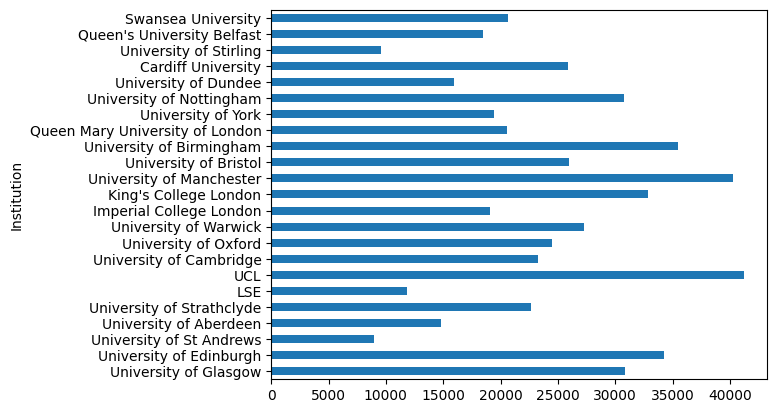

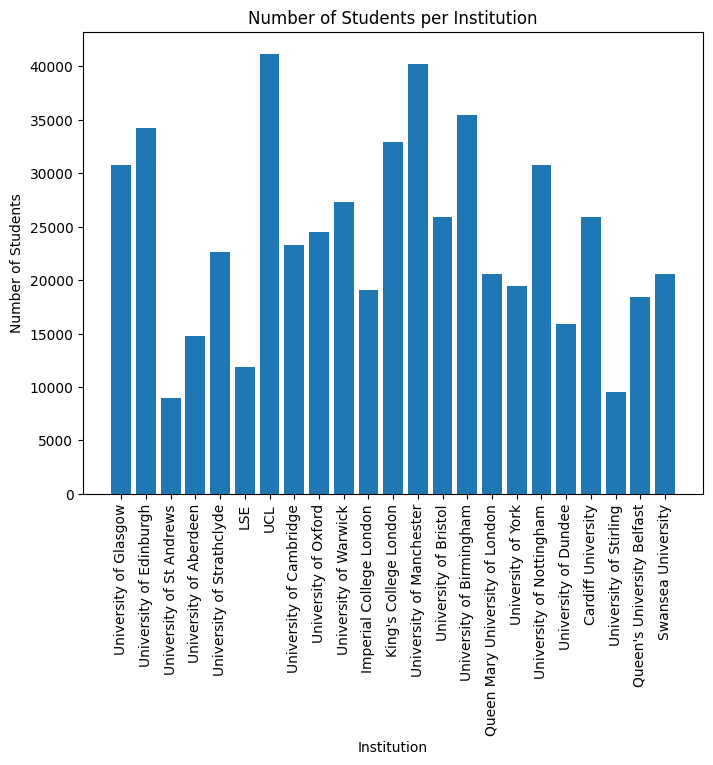

In [133]:

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.bar(df2.index, df2['Students'])
plt.xlabel('Institution')
plt.xticks(rotation=90) # Rotate x-axis labels vertically
plt.ylabel('Number of Students')
plt.title('Number of Students per Institution')
plt.show()

Or we can use groups to get a snapshot of different statistics. 

Make a pie chart to show the number of universities in each country.

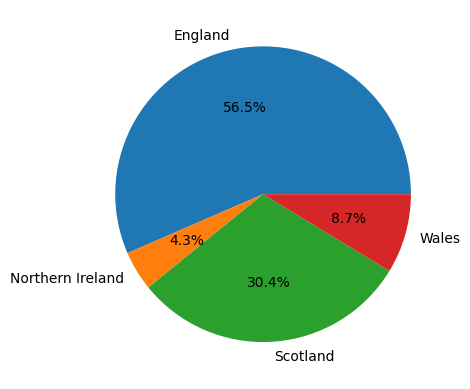

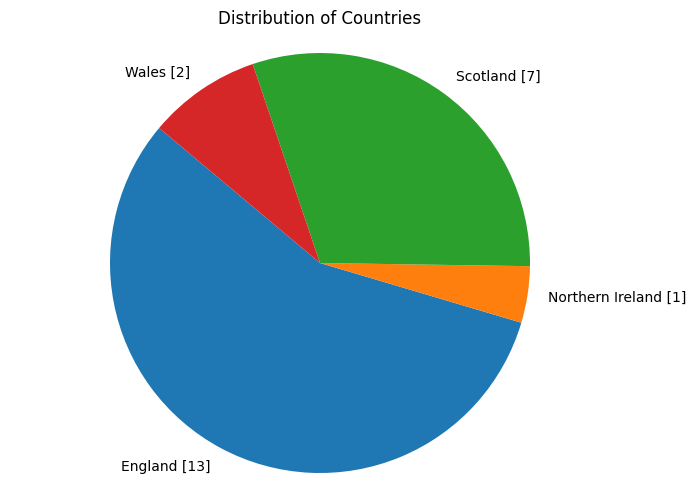

In [134]:

## If you want it a little bit prettier and show the numerical counts instead, you will likely want to use matplotlib
grouped = df.groupby('Country').size()
plt.figure(figsize=(8, 6))
plt.pie(grouped, labels=[f'{c} [{grouped[c]}]' for c in grouped.index], autopct='', startangle=140)
plt.axis('equal')
plt.title('Distribution of Countries')
plt.show()

Since displaying the counts is difficult, maybe we want a historgram instead?

What if I wanted to make a box and whisker plot of the years each institution was founded?

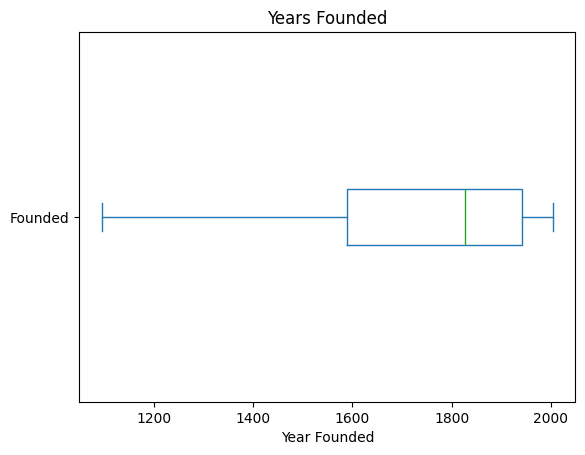

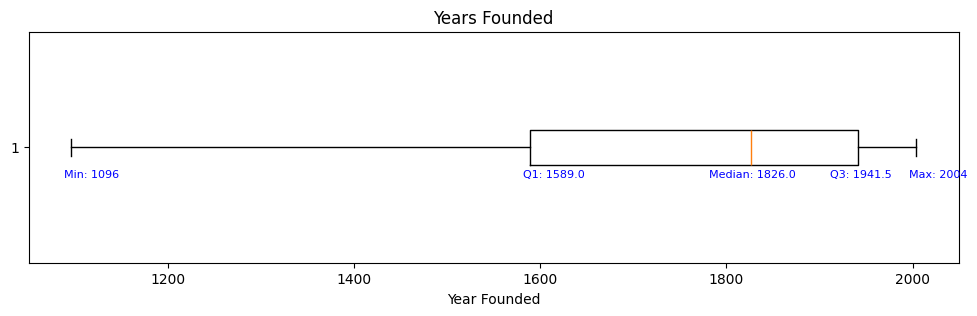

In [135]:

# Again using Matplotlib
plt.figure(figsize=(12, 3))
plt.boxplot(df['Founded'], vert=False)
plt.xlabel('Year Founded')
plt.title('Years Founded')

# Calculate quartiles and median
quartiles = df['Founded'].quantile([0.25, 0.5, 0.75])
# Add labels for quartiles and endpoints
plt.annotate(f'Q1: {quartiles[0.25]}', xy=(quartiles[0.25], 1), xytext=(-5, -22),
             textcoords='offset points', fontsize=8, color='blue')
plt.annotate(f'Median: {quartiles[0.5]}', xy=(quartiles[0.5], 1), xytext=(-30, -22),
             textcoords='offset points', fontsize=8, color='blue')
plt.annotate(f'Q3: {quartiles[0.75]}', xy=(quartiles[0.75], 1), xytext=(-20, -22),
             textcoords='offset points', fontsize=8, color='blue')
plt.annotate(f'Min: {df["Founded"].min()}', xy=(df["Founded"].min(), 1), xytext=(-5, -22),
             textcoords='offset points', fontsize=8, color='blue')
plt.annotate(f'Max: {df["Founded"].max()}', xy=(df["Founded"].max(), 1), xytext=(-5, -22),
             textcoords='offset points', fontsize=8, color='blue')
plt.show()


What are must have features of graphs?

1. 
2. 
3. 